In [281]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 8, 6   # set the size of the figure

In [282]:
data2=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task3.csv')
data2.head()

,x1,x2,y
0,2.129573,0.629904,1
1,1.888882,0.146257,1
2,-0.190357,0.383993,0
3,-0.404416,0.195282,1
4,0.373012,-0.429716,1


In [283]:
X = data2.iloc[:,0:2]
Y = data2.iloc[:,2]

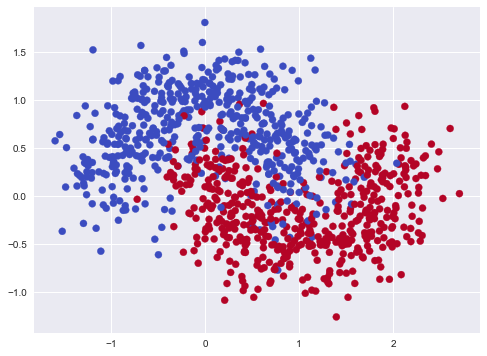

In [284]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = Y,s = 50,cmap= 'coolwarm')

In [285]:
from sklearn.model_selection import train_test_split

In [286]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [287]:
X_train_1, X_vali, Y_train_1, Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

In [288]:
from sklearn.svm import SVC

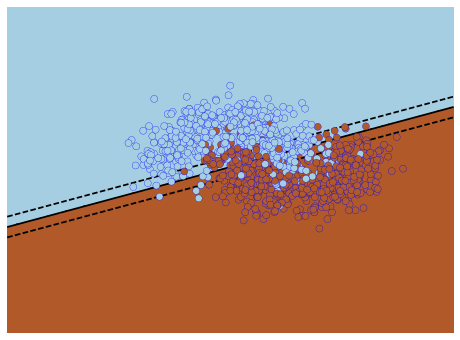

we successfully predict the 93 percent of data


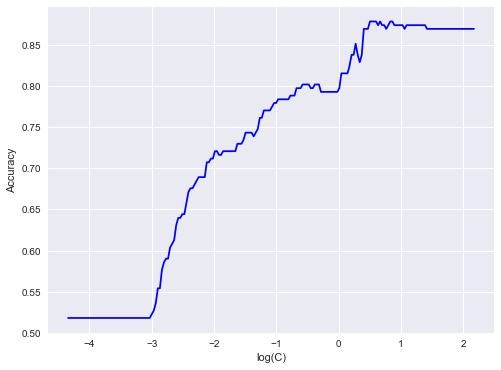

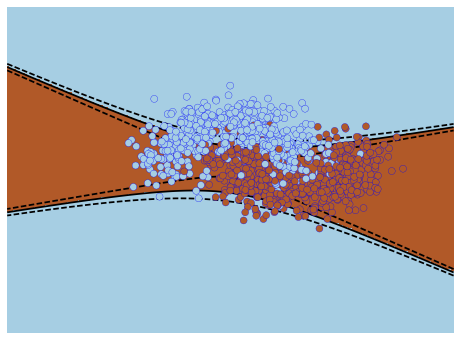

we successfully predict the 87 percent of data


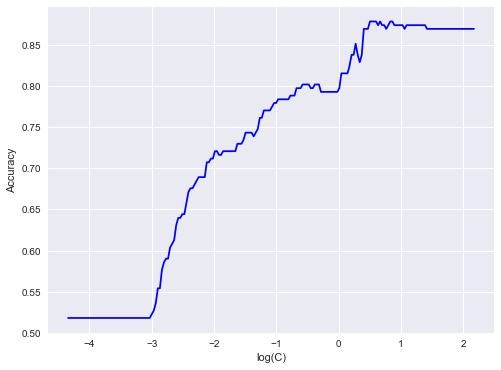

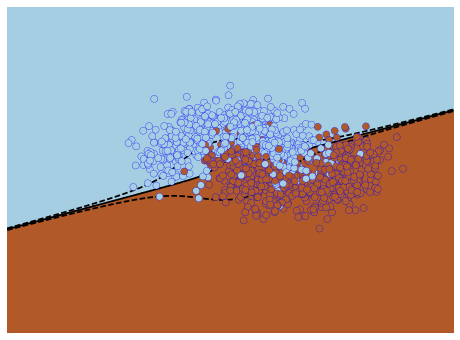

we successfully predict the 93 percent of data


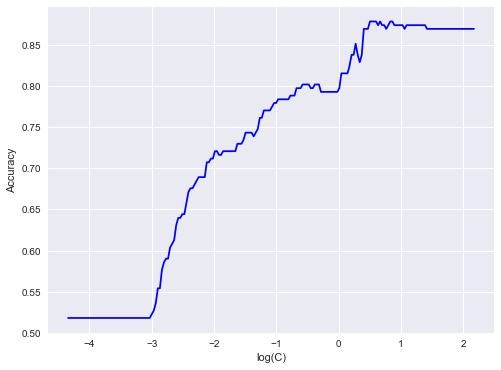

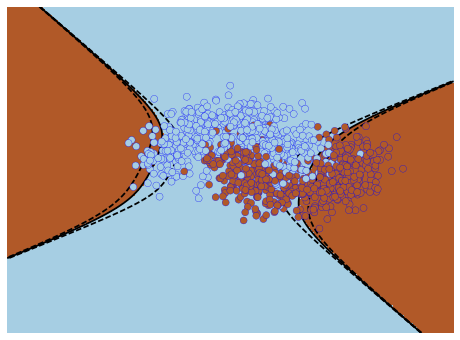

we successfully predict the 84 percent of data


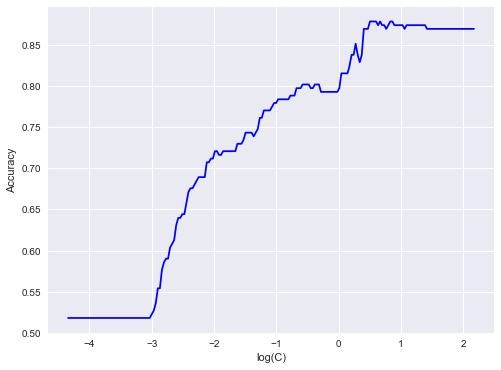

In [289]:
for i in range(1,5):
    degree = i
    clf = SVC(kernel = 'poly', degree = degree)
    clf.fit(X,Y)
    plt.clf()


    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', zorder=10) # plot support vectors with small circle

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,marker = 'o',edgecolors = 'b') # plot X,Y
    plt.axis('tight')
    x_min = -3.5
    x_max = 3.5
    y_min = -3.5
    y_max = 3.5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)

    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    # Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
    print "we successfully predict the {} percent of data".format(100-abs(clf.predict(X)-Y).sum()*50/len(Y))
    import pylab
    import math
    from sklearn.svm import SVC
    X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=70)
    C=[math.exp(i) for i in np.linspace(-10,5,200)]
    C[0:10]
    from sklearn.svm import SVC
    OS_validation=[]
    for c in C:
        clf = SVC(kernel='poly',C=c) 
        clf.fit(X_train_1, Y_train_1)
        right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(right)
    temp=pd.DataFrame([C,OS_validation]).T
    temp.head()
    ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
    C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]
    C=[math.log(y,10) for y in C] #for a better graph
    pylab.plot(C,OS_validation,'b',)
    pylab.legend(loc='upper right')
    pylab.ylabel('Accuracy')
    pylab.xlabel('log(C)')
    pylab.show()






In [290]:
clf = SVC(kernel='linear',C=C_opt)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by using linear model".format((correct)*100)

we successfully(OS) predict the 86.9696969697 percent of data by using linear model
